In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

In [2]:
test_df = pd.read_csv('test_values.csv')
train_set = pd.read_csv('train_values.csv')
labels_set = pd.read_csv('train_labels_abiUmgM.csv')

In [3]:
rate_spread = pd.merge(labels_set, train_set, how = 'left', on ='row_id')

In [4]:
rate_spread.head()

,row_id,rate_spread,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,1.0,2,1,1,1,139.0,1,261,14,...,1,77.0,5949.0,11.642,63192.0,100.000,1556.0,1993.0,2094,True
1,1,2.0,2,2,1,1,160.0,3,349,48,...,1,42.0,2667.0,37.141,63693.0,75.729,875.0,1163.0,4194,False
2,2,3.0,1,2,1,1,168.0,3,385,30,...,1,34.0,6393.0,79.635,42883.0,76.948,636.0,1611.0,1119,False
3,3,6.0,1,2,1,1,57.0,3,117,30,...,1,37.0,7175.0,72.843,63806.0,78.836,1587.0,2172.0,1119,False
4,4,4.0,2,1,2,1,25.0,3,95,41,...,2,46.0,5041.0,23.188,70908.0,59.579,756.0,1992.0,1593,False


In [5]:
rate_spread.shape

(200000, 23)

In [6]:
test_df.shape

(200000, 22)

In [7]:
rate_spread.dtypes

row_id                              int64
rate_spread                       float64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
dtype: object

In [8]:
(rate_spread.astype(np.object) == '?').any()

row_id                            False
rate_spread                       False
loan_type                         False
property_type                     False
loan_purpose                      False
occupancy                         False
loan_amount                       False
preapproval                       False
msa_md                            False
state_code                        False
county_code                       False
applicant_ethnicity               False
applicant_race                    False
applicant_sex                     False
applicant_income                  False
population                        False
minority_population_pct           False
ffiecmedian_family_income         False
tract_to_msa_md_income_pct        False
number_of_owner-occupied_units    False
number_of_1_to_4_family_units     False
lender                            False
co_applicant                      False
dtype: bool

In [9]:
(test_df.astype(np.object) == '?').any()

row_id                            False
loan_type                         False
property_type                     False
loan_purpose                      False
occupancy                         False
loan_amount                       False
preapproval                       False
msa_md                            False
state_code                        False
county_code                       False
applicant_ethnicity               False
applicant_race                    False
applicant_sex                     False
applicant_income                  False
population                        False
minority_population_pct           False
ffiecmedian_family_income         False
tract_to_msa_md_income_pct        False
number_of_owner-occupied_units    False
number_of_1_to_4_family_units     False
lender                            False
co_applicant                      False
dtype: bool

In [10]:
rate_spread.describe()

,row_id,rate_spread,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,...,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,189292.000000,198005.000000,198005.000000,198015.000000,197977.000000,197988.000000,197984.000000,200000.000000
mean,99999.500000,1.979110,1.570935,1.154880,1.482605,1.061385,142.574940,2.702950,226.974970,28.202045,...,4.762685,1.417540,73.617902,5391.099099,34.238640,64595.355801,89.283022,1402.872401,1927.336618,2001.311505
std,57735.171256,1.656809,0.559410,0.365066,0.822156,0.246043,142.559487,0.545658,106.655259,15.593383,...,0.887328,0.577133,105.696934,2669.028807,27.930882,12724.514485,15.059223,706.880410,886.576586,1271.134197
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,...,1.000000,1.000000,1.000000,7.000000,0.326000,17860.000000,6.193000,3.000000,6.000000,0.000000
25%,49999.750000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,2.000000,154.000000,14.000000,...,5.000000,1.000000,39.000000,3717.000000,10.928000,56654.000000,81.648000,932.000000,1344.000000,963.000000
50%,99999.500000,1.000000,2.000000,1.000000,1.000000,1.000000,116.000000,3.000000,261.000000,30.000000,...,5.000000,1.000000,56.000000,4959.000000,25.996000,63485.000000,98.959000,1304.000000,1799.000000,1834.000000
75%,149999.250000,2.000000,2.000000,1.000000,2.000000,1.000000,179.000000,3.000000,318.000000,41.000000,...,5.000000,2.000000,83.000000,6470.000000,52.000000,71238.000000,100.000000,1742.000000,2353.000000,3180.000000
max,199999.000000,99.000000,4.000000,3.000000,3.000000,3.000000,11104.000000,3.000000,408.000000,52.000000,...,7.000000,4.000000,10042.000000,34126.000000,100.000000,125095.000000,100.000000,8747.000000,13615.000000,4283.000000


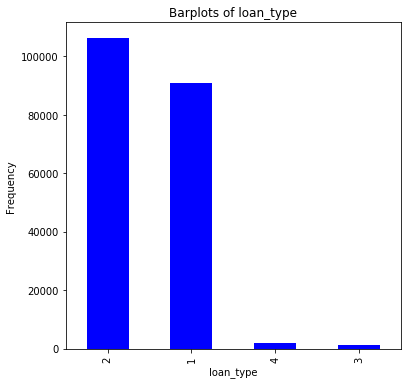

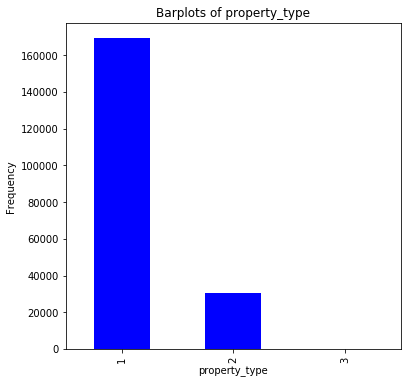

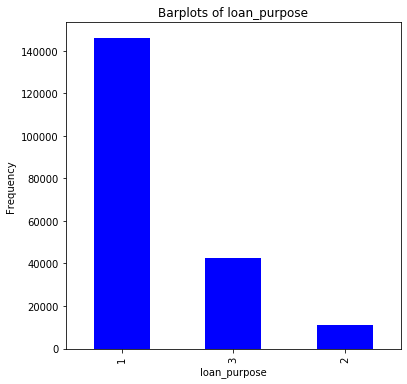

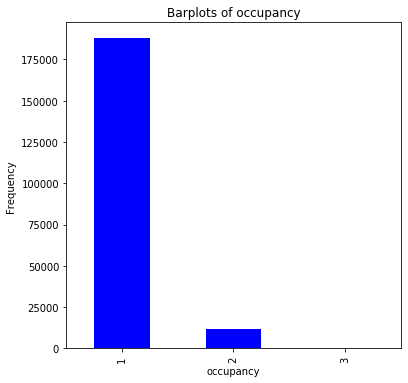

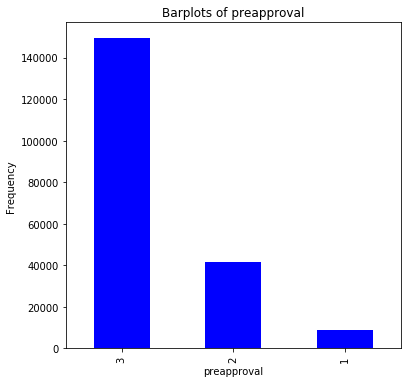

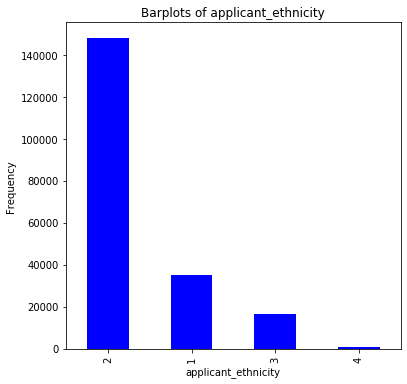

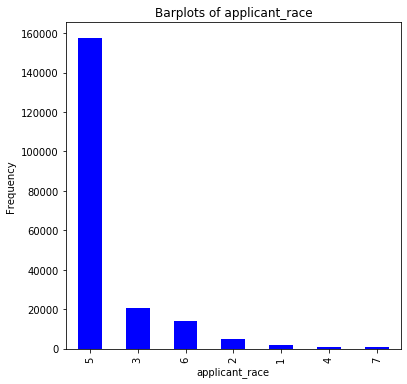

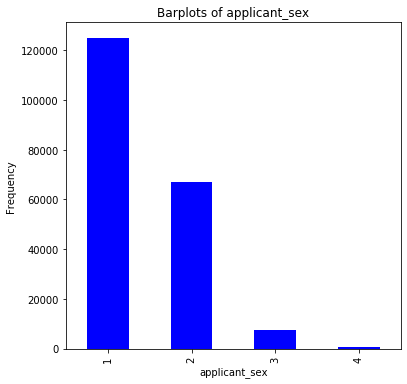

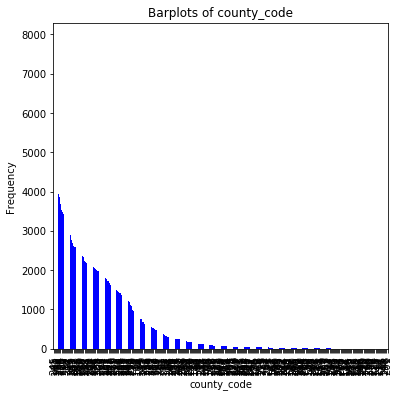

In [11]:
def plot_bars(rate_spread, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = rate_spread[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Barplots of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Frequency ')# Set text for y axis
        plt.show()

plot_cols = ['loan_type', 'property_type', 'loan_purpose', 'occupancy',
             'preapproval', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'county_code']
plot_bars(rate_spread, plot_cols)

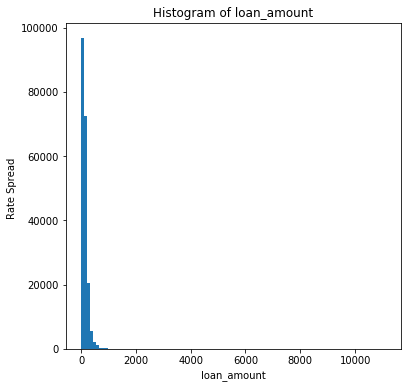

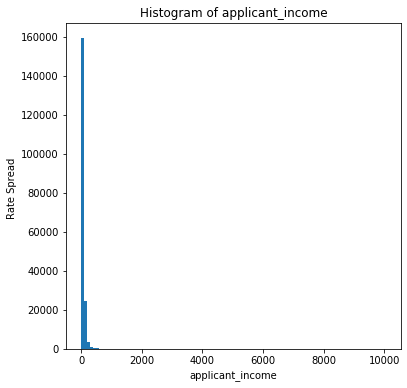

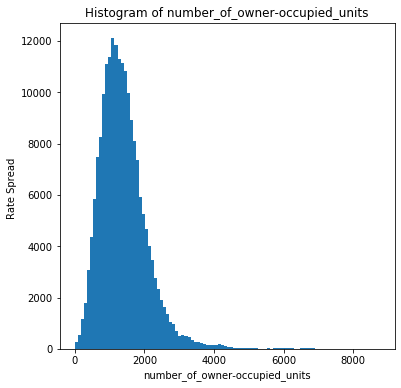

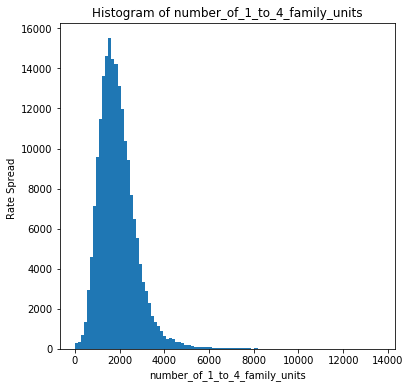

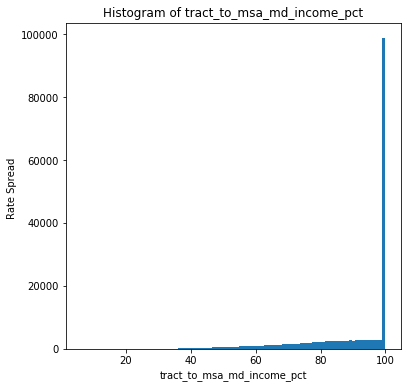

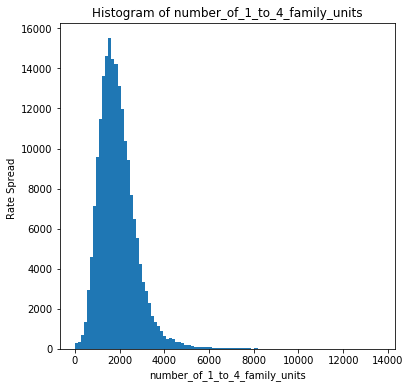

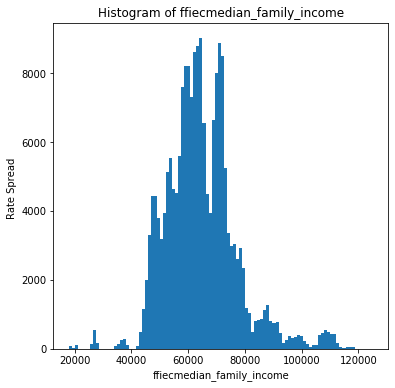

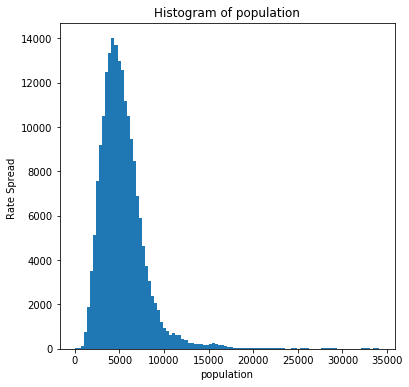

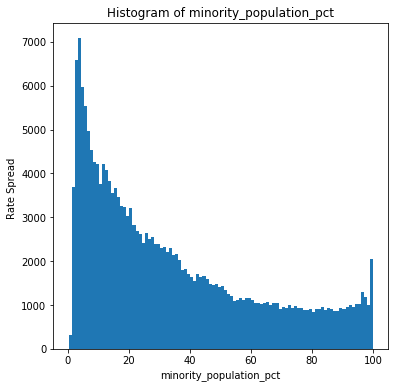

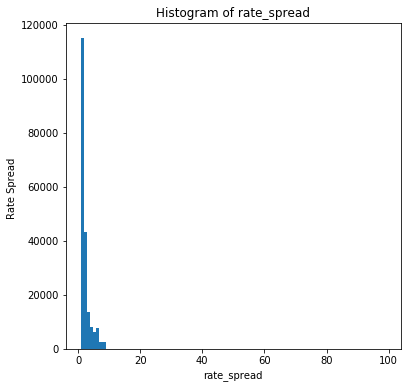

In [12]:
import seaborn as sns
def plot_histogram(rate_spread, cols, bins = 100):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        rate_spread[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Rate Spread ')# Set text for y axis
        plt.show()
        
num_cols = ['loan_amount', 'applicant_income', 'number_of_owner-occupied_units', 
            'number_of_1_to_4_family_units', 'tract_to_msa_md_income_pct', 'number_of_1_to_4_family_units',
           'ffiecmedian_family_income', 'population', 'minority_population_pct', 'rate_spread']    
plot_histogram(rate_spread, num_cols)

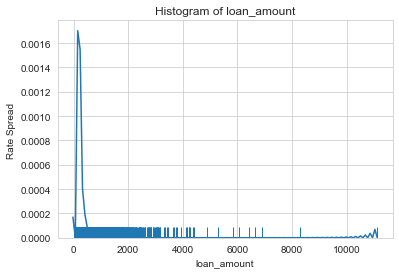

C:\Users\user\.anaconda\Anaconda0819\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\.anaconda\Anaconda0819\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


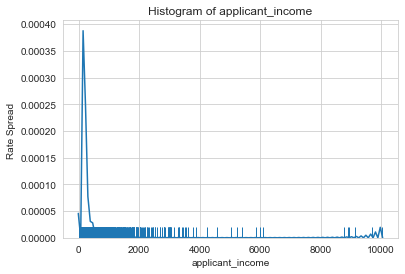

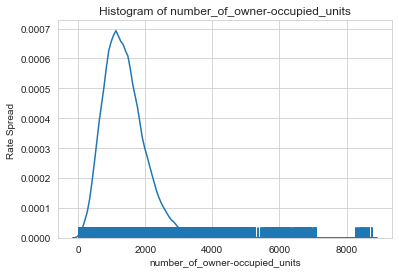

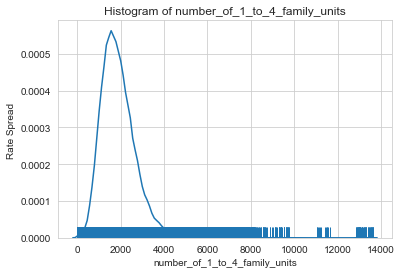

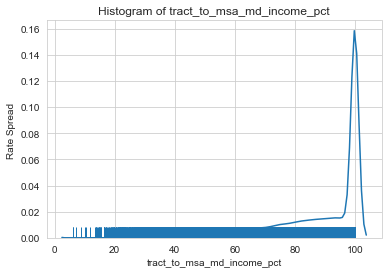

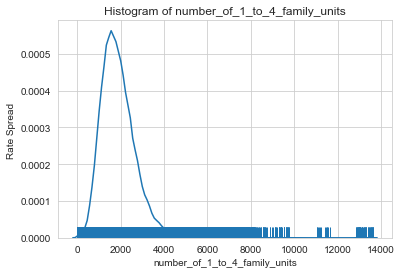

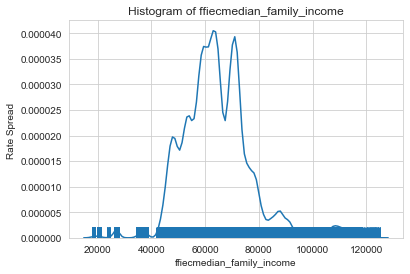

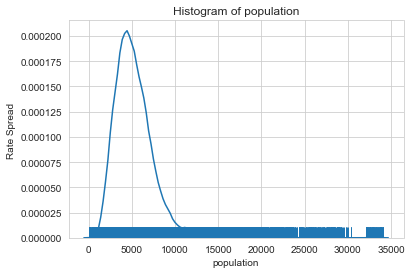

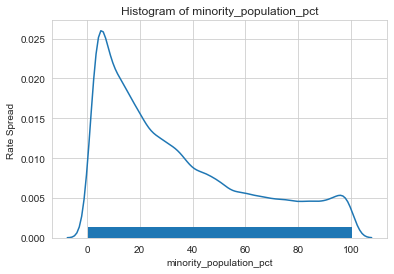

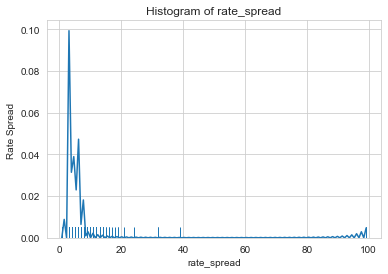

In [13]:
def plot_density_hist(rate_spread, cols, bins = 20, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(rate_spread[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Rate Spread ')# Set text for y axis
        plt.show()
        
plot_density_hist(rate_spread, num_cols)

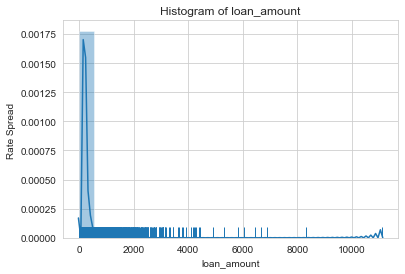

C:\Users\user\.anaconda\Anaconda0819\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\.anaconda\Anaconda0819\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


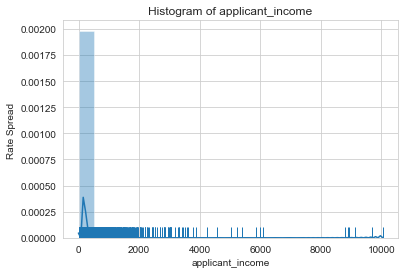

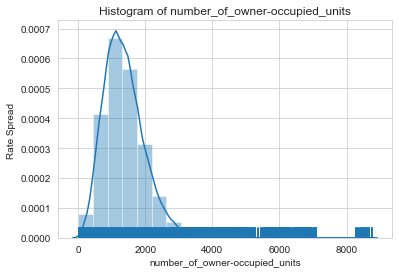

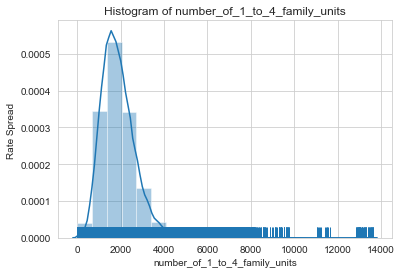

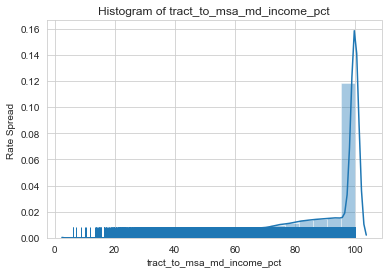

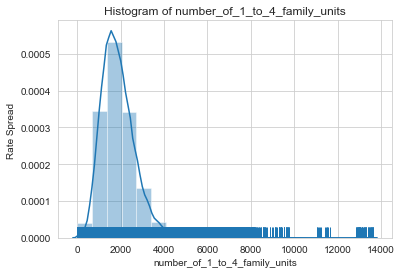

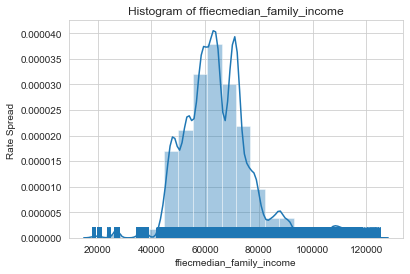

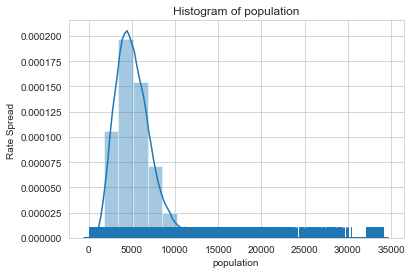

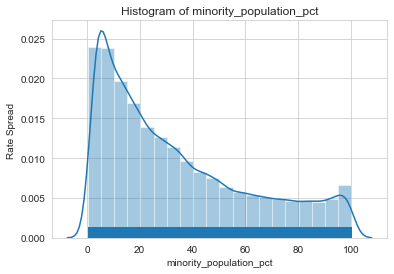

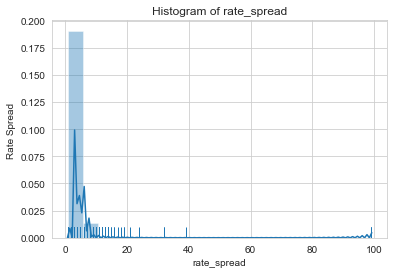

In [14]:
plot_density_hist(rate_spread, num_cols, bins = 20, hist = True)     

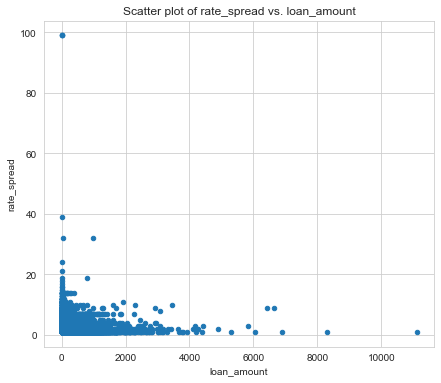

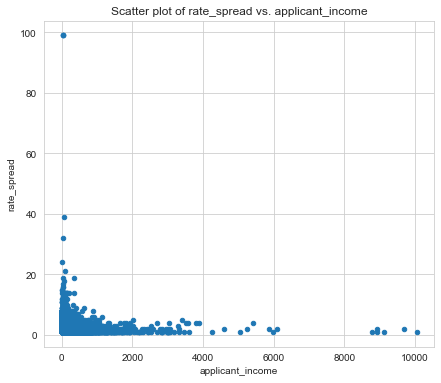

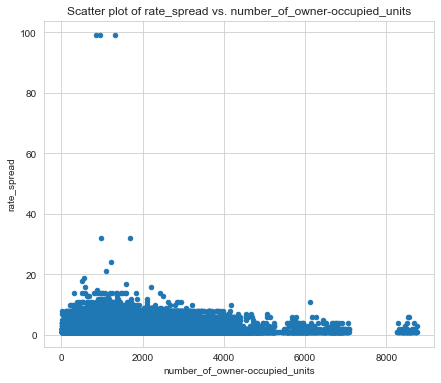

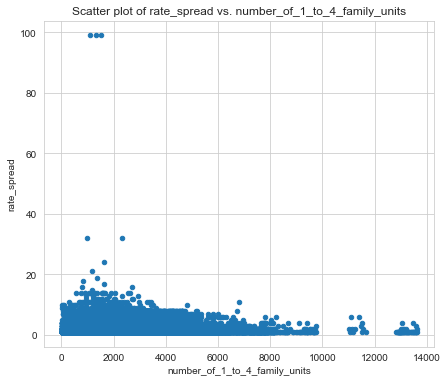

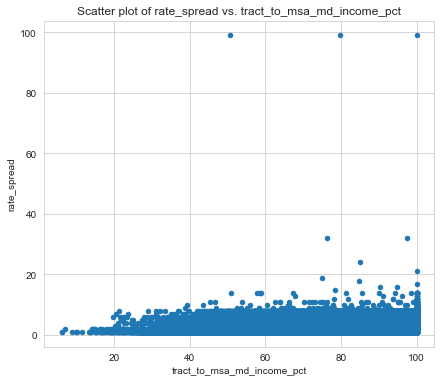

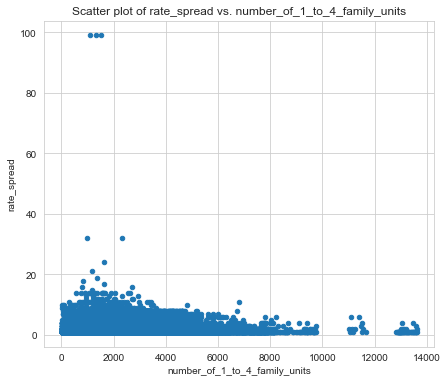

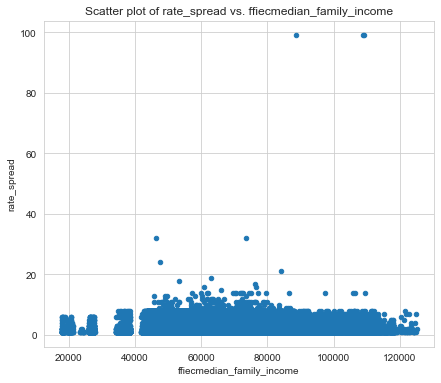

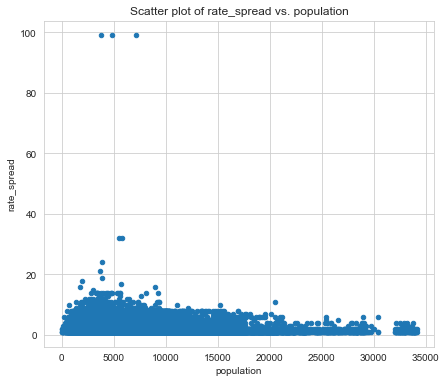

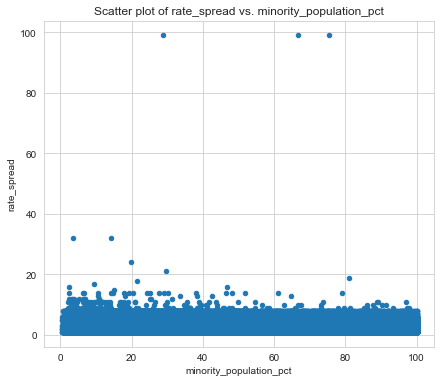

In [15]:
def plot_scatter(rate_spread, cols, col_y = 'rate_spread'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        rate_spread.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

num_cols = ['loan_amount', 'applicant_income', 'number_of_owner-occupied_units', 
            'number_of_1_to_4_family_units', 'tract_to_msa_md_income_pct', 'number_of_1_to_4_family_units',
           'ffiecmedian_family_income', 'population', 'minority_population_pct']   
plot_scatter(rate_spread, num_cols)        

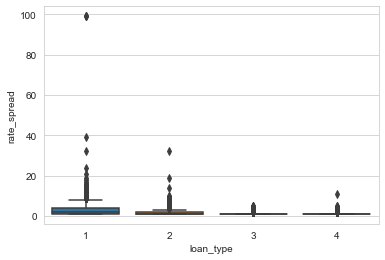

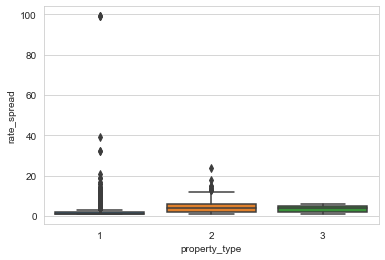

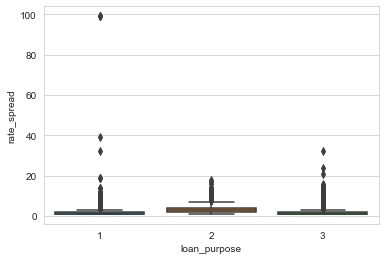

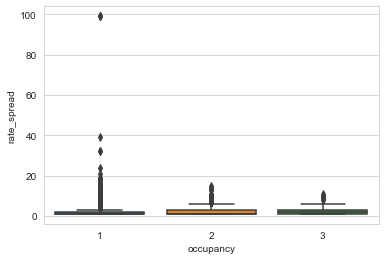

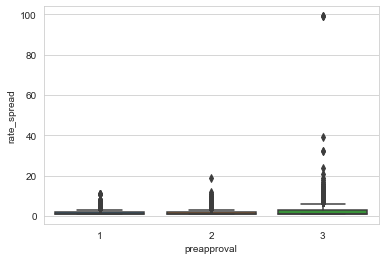

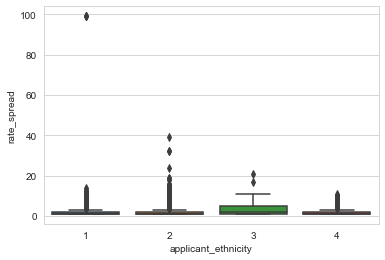

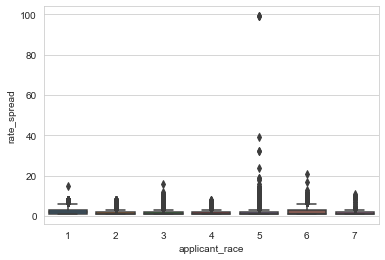

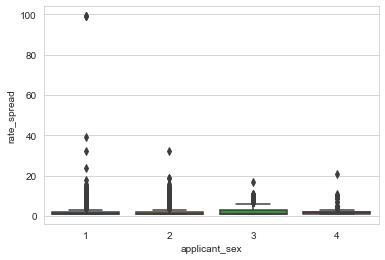

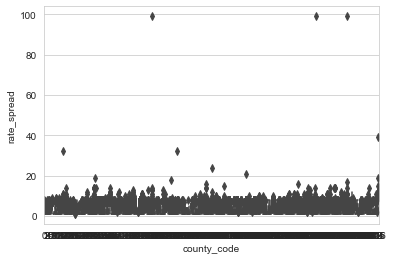

In [16]:
def plot_box(rate_spread, cols, col_y = 'rate_spread'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=rate_spread)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['ward', ]
plot_box(rate_spread, cat_cols)    

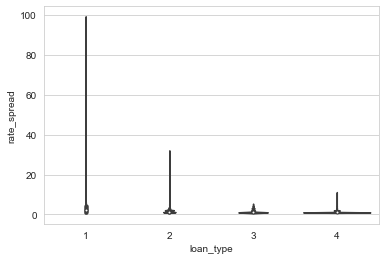

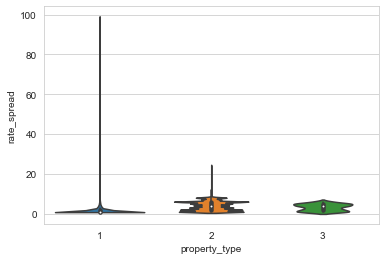

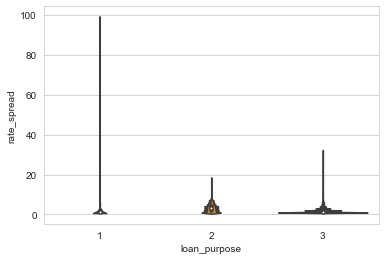

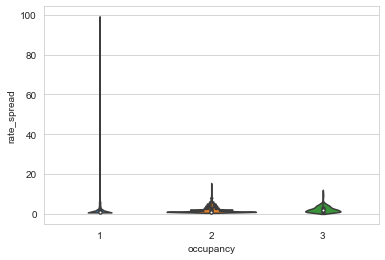

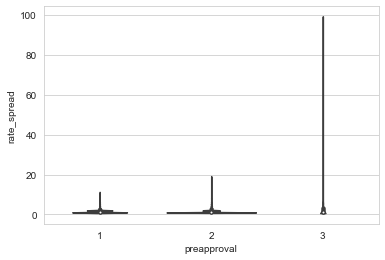

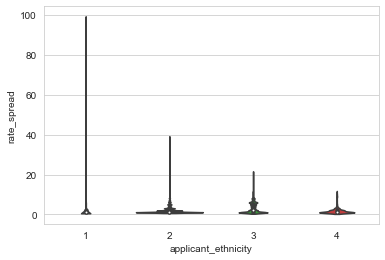

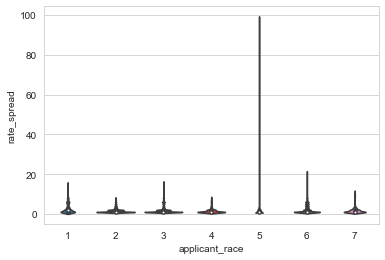

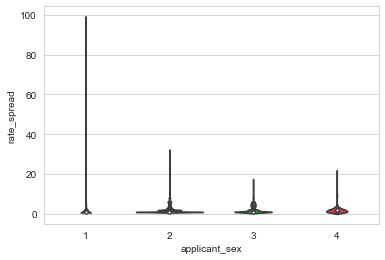

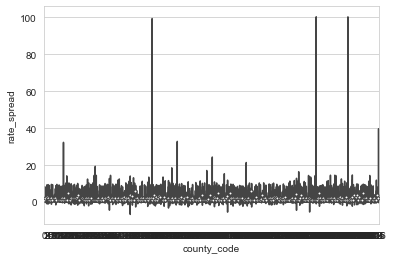

In [17]:
def plot_violin(rate_spread, cols, col_y = 'rate_spread'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=rate_spread)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(rate_spread, cat_cols)   

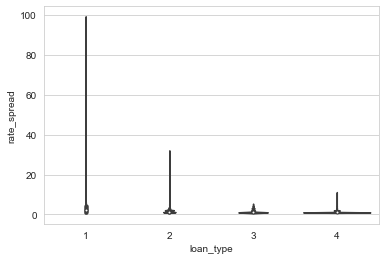

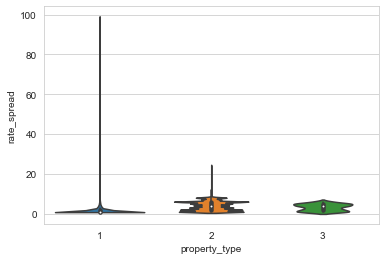

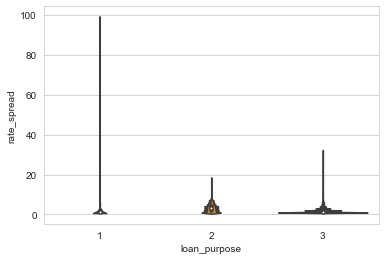

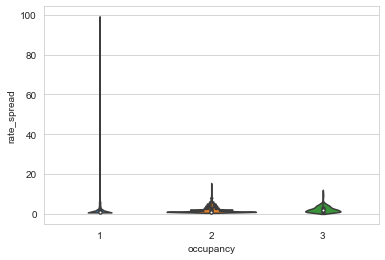

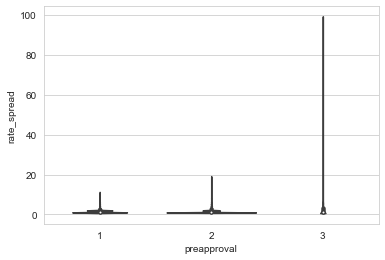

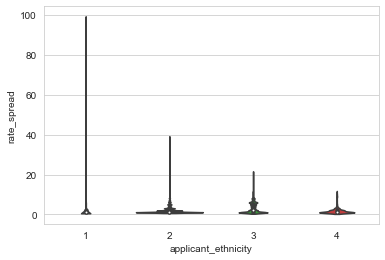

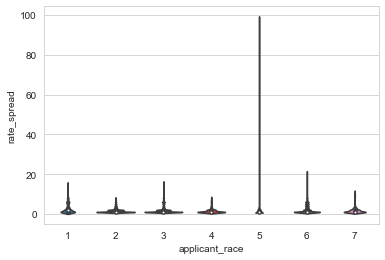

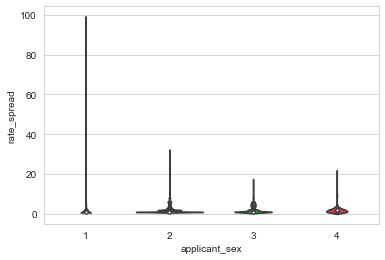

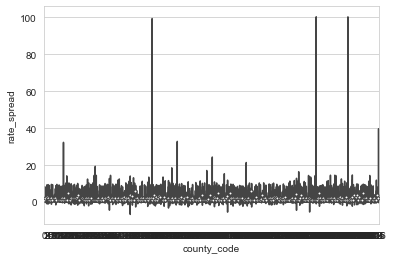

In [18]:
def plot_violin_hue(rate_spread, cols, col_y = 'rate_spread'):
    colors = ['green', 'blue', 'orange', 'magenta', 'gray']
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=rate_spread, split = True)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin_hue(rate_spread, cat_cols)    

In [19]:
numericals = rate_spread[['loan_amount', 'applicant_income', 'number_of_owner-occupied_units', 
            'number_of_1_to_4_family_units', 'tract_to_msa_md_income_pct', 'number_of_1_to_4_family_units',
           'ffiecmedian_family_income', 'population', 'minority_population_pct', 'rate_spread']].copy()

In [20]:
numericals.head()

,loan_amount,applicant_income,number_of_owner-occupied_units,number_of_1_to_4_family_units,tract_to_msa_md_income_pct,number_of_1_to_4_family_units,ffiecmedian_family_income,population,minority_population_pct,rate_spread
0,139.0,77.0,1556.0,1993.0,100.000,1993.0,63192.0,5949.0,11.642,1.0
1,160.0,42.0,875.0,1163.0,75.729,1163.0,63693.0,2667.0,37.141,2.0
2,168.0,34.0,636.0,1611.0,76.948,1611.0,42883.0,6393.0,79.635,3.0
3,57.0,37.0,1587.0,2172.0,78.836,2172.0,63806.0,7175.0,72.843,6.0
4,25.0,46.0,756.0,1992.0,59.579,1992.0,70908.0,5041.0,23.188,4.0


In [21]:
#Now let's find out if there is any correlation between the numeric features and the target
corr = rate_spread.corr()
#the line below prints out the most positively correlated
print (corr['rate_spread'].sort_values(ascending=False)[:9], '\n')
#the line below prints out the most negatively correlated
print (corr['rate_spread'].sort_values(ascending=False)[-9:])

rate_spread                      1.000000
property_type                    0.512573
preapproval                      0.188740
applicant_ethnicity              0.144305
co_applicant                     0.042659
applicant_race                   0.025557
msa_md                           0.022623
occupancy                        0.022390
number_of_1_to_4_family_units    0.020661
Name: rate_spread, dtype: float64 

row_id                       0.002238
state_code                  -0.016282
applicant_income            -0.020662
population                  -0.034157
minority_population_pct     -0.076955
ffiecmedian_family_income   -0.084964
lender                      -0.112019
loan_amount                 -0.218168
loan_type                   -0.391757
Name: rate_spread, dtype: float64


C:\Users\user\.anaconda\Anaconda0819\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


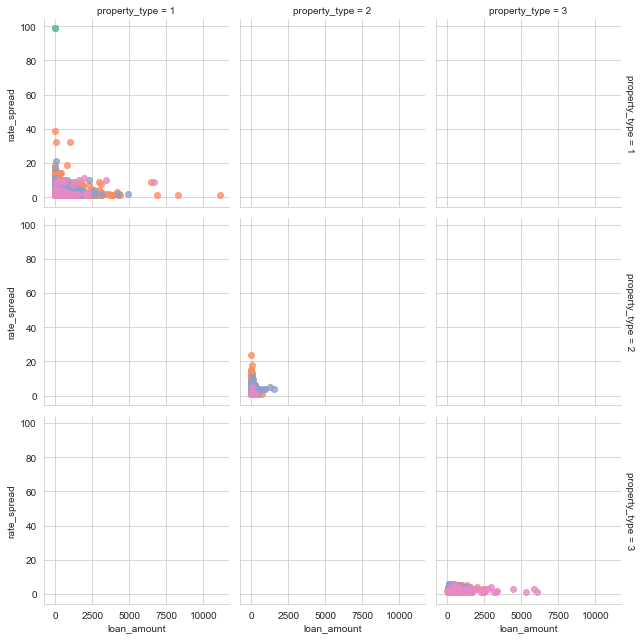

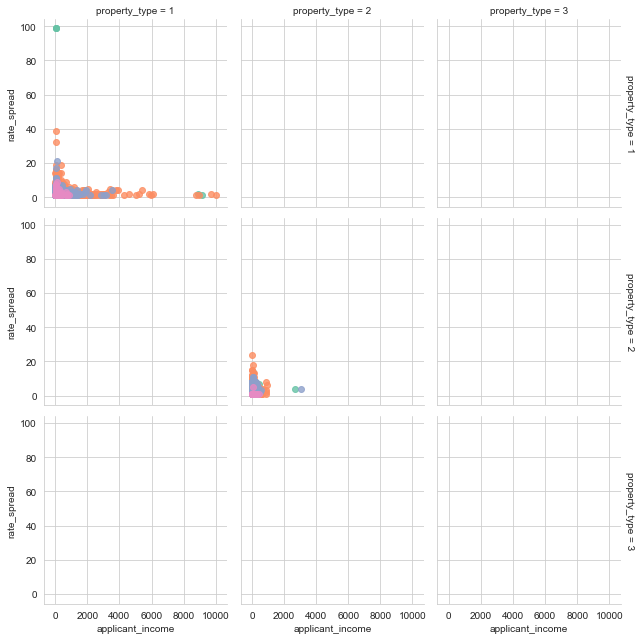

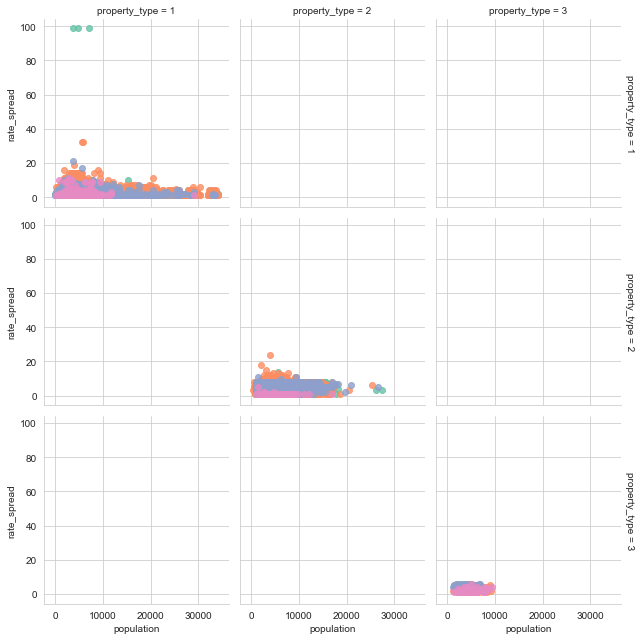

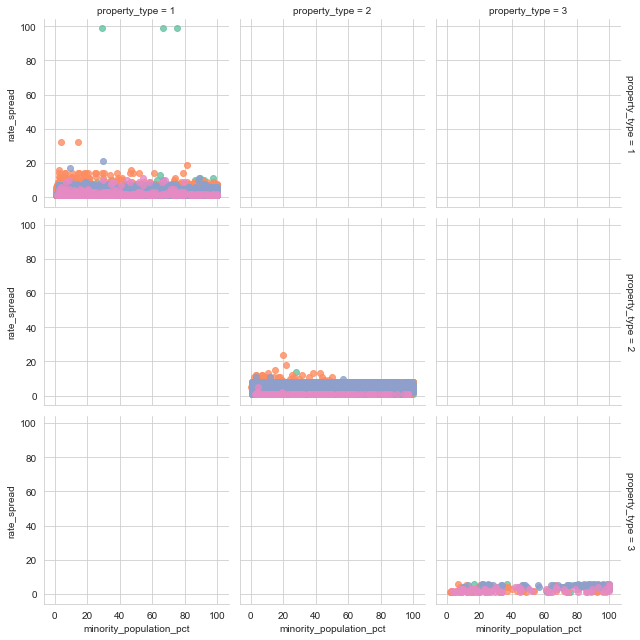

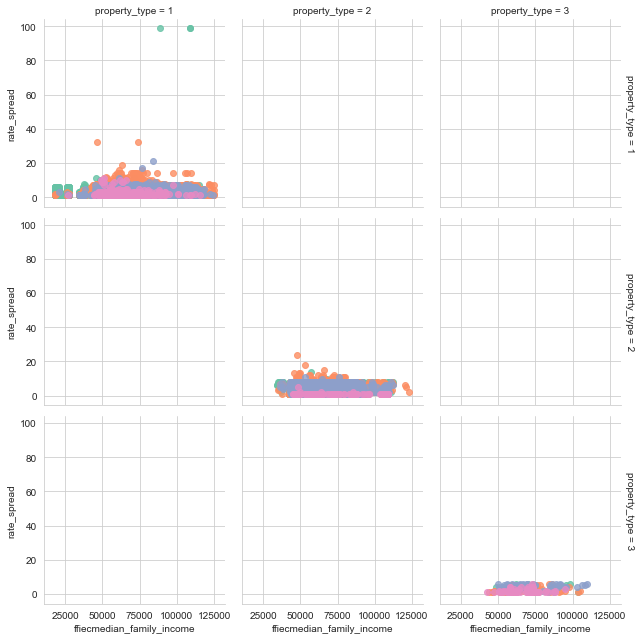

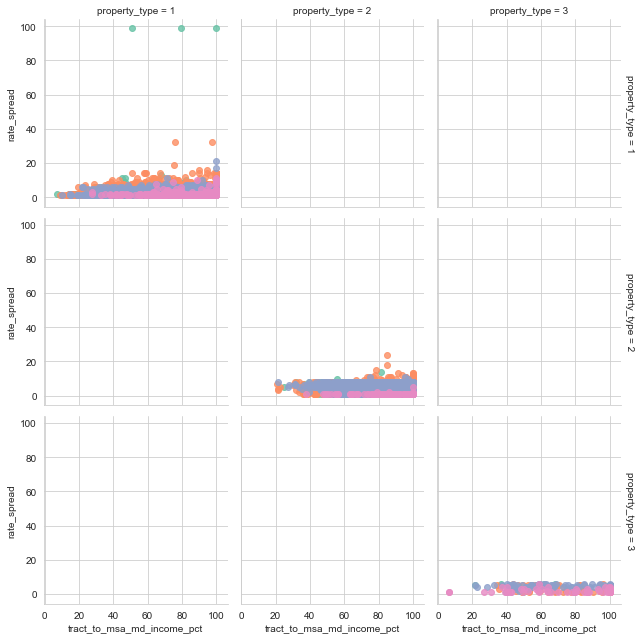

In [22]:
def cond_plot(cols):
    import IPython.html.widgets
    import seaborn as sns
    for col in cols:
        g = sns.FacetGrid(rate_spread, col="property_type", row = 'property_type', 
                      hue="applicant_ethnicity", palette="Set2", margin_titles=True)
        g.map(sns.regplot, col, "rate_spread", fit_reg = False)

num_cols = ['loan_amount', 'applicant_income', 'population',
            'minority_population_pct', 'ffiecmedian_family_income', 'tract_to_msa_md_income_pct']
cond_plot(num_cols)

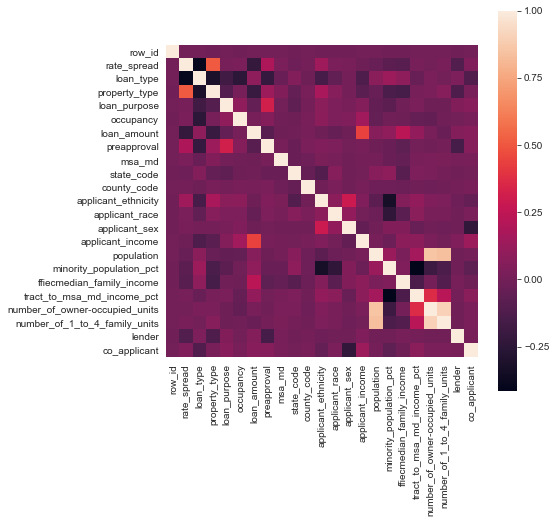

In [23]:
corrmat= rate_spread.corr()
f, ax =plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, square=True, annot=False)

Text(0.5, 0, 'Value of output from linear regression')

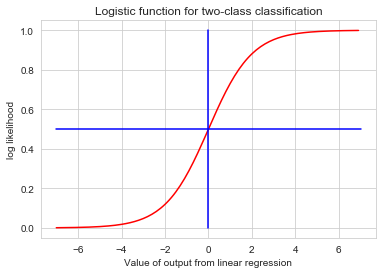

In [24]:
xseq = np.arange(-7, 7, 0.1)

logistic = [math.exp(v)/(1 + math.exp(v)) for v in xseq]

plt.plot(xseq, logistic, color = 'red')
plt.plot([-7,7], [0.5,0.5], color = 'blue')
plt.plot([0,0], [0,1], color = 'blue')
plt.title('Logistic function for two-class classification')
plt.ylabel('log likelihood')
plt.xlabel('Value of output from linear regression')

In [25]:
#Lets check the unique rating values for the property type
rate_spread.property_type.unique()

array([1, 2, 3], dtype=int64)

In [26]:
#lets create a pivot table to further check the relationship between rate spread and property type
propType_pivot = rate_spread.pivot_table(index='property_type',
                  values='rate_spread', aggfunc=np.median)

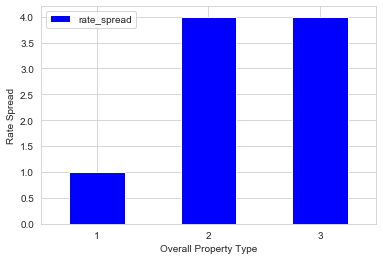

In [27]:
#lets use a barplot to visualise
propType_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Property Type')
plt.ylabel('Rate Spread')
plt.xticks(rotation=0)
plt.show()

In [28]:
#encode values
def encode(x):
 return 1 if x == '2' or '3' else 0
rate_spread['enc_propType'] = rate_spread.property_type.apply(encode)
test_df['enc_propType'] = test_df.property_type.apply(encode)

In [29]:
#lets create a pivot table to further check the relationship between rate spread and property type
ethnicity_pivot = rate_spread.pivot_table(index='applicant_ethnicity',
                  values='rate_spread', aggfunc=np.median)

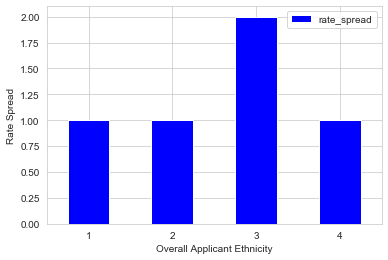

In [30]:
#lets use a barplot to visualise
ethnicity_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Applicant Ethnicity')
plt.ylabel('Rate Spread')
plt.xticks(rotation=0)
plt.show()

In [31]:
#encode values
def encode(x):
 return 1 if x == '3' else 0
rate_spread['enc_ethnicity'] = rate_spread.property_type.apply(encode)
test_df['enc_ethnicity'] = test_df.property_type.apply(encode)

In [32]:
#lets create a pivot table to further check the relationship between rate spread and property type
LoanType_pivot = rate_spread.pivot_table(index='loan_type',
                  values='rate_spread', aggfunc=np.median)

In [33]:
#encode values
def encode(x):
 return 0 if x == '1' else 1
rate_spread['enc_LoanType'] = rate_spread.loan_type.apply(encode)
test_df['enc_LoanType'] = test_df.loan_type.apply(encode)

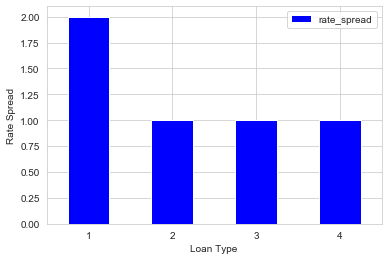

In [34]:
#lets use a barplot to visualise
LoanType_pivot.plot(kind='bar', color='blue')
plt.xlabel('Loan Type')
plt.ylabel('Rate Spread')
plt.xticks(rotation=0)
plt.show()

In [35]:
#lets create a pivot table to further check the relationship between rate spread and Pre-approval
coApp_pivot = rate_spread.pivot_table(index='co_applicant',
                                    values='rate_spread', aggfunc=np.median)

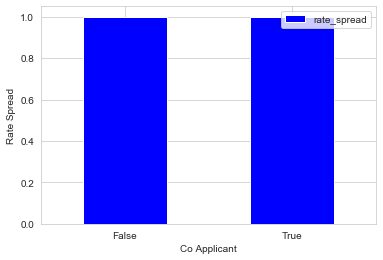

In [36]:
#lets use a barplot to visualise
coApp_pivot.plot(kind='bar', color='blue')
plt.xlabel('Co Applicant')
plt.ylabel('Rate Spread')
plt.xticks(rotation=0)
plt.show()

In [37]:
#encode values
def encode(x):
 return 1 if x == 'True' else 0
rate_spread['enc_coApp'] = rate_spread.co_applicant.apply(encode)
test_df['enc_coApp'] = test_df.co_applicant.apply(encode)

In [38]:
#lets create a pivot table to further check the relationship between rate spread and Pre-approval
appSex_pivot = rate_spread.pivot_table(index='applicant_sex',
                                     values='rate_spread', aggfunc=np.median)

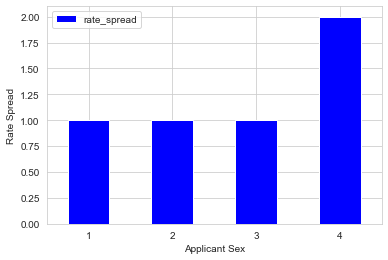

In [39]:
#lets use a barplot to visualise
appSex_pivot.plot(kind='bar', color='blue')
plt.xlabel('Applicant Sex')
plt.ylabel('Rate Spread')
plt.xticks(rotation=0)
plt.show()

In [40]:
def encode(x):
 return 1 if x == 4 else 0
rate_spread['enc_appSex'] = rate_spread.applicant_sex.apply(encode)
test_df['enc_appSex'] = test_df.applicant_sex.apply(encode)

In [41]:
#lets create a pivot table to further check the relationship between rate spread and Pre-approval
preApp_pivot = rate_spread.pivot_table(index='preapproval',
                                     values='rate_spread', aggfunc=np.median)

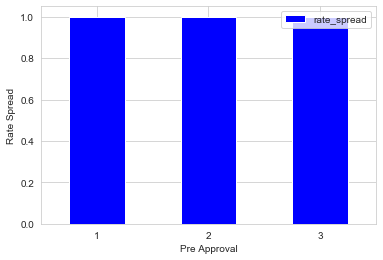

In [42]:
#lets use a barplot to visualise
preApp_pivot.plot(kind='bar', color='blue')
plt.xlabel('Pre Approval')
plt.ylabel('Rate Spread')
plt.xticks(rotation=0)
plt.show()

In [43]:
def encode(x):
 return 1 if x == 1 or 2 or 3 else 0
rate_spread['enc_preApp'] = rate_spread.preapproval.apply(encode)
test_df['enc_preApp'] = test_df.preapproval.apply(encode)

In [44]:
#lets create a pivot table to further check the relationship between rate spread and Lender
appRace_pivot = rate_spread.pivot_table(index='applicant_race',
                                     values='rate_spread', aggfunc=np.median)

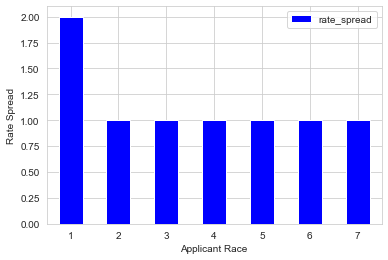

In [45]:
##lets use a barplot to visualise
appRace_pivot.plot(kind='bar', color='blue')
plt.xlabel('Applicant Race')
plt.ylabel('Rate Spread')
plt.xticks(rotation=0)
plt.show()

In [46]:
#encode values
def encode(x):
 return 1 if x == '1' else 0
rate_spread['enc_appRace'] = rate_spread.applicant_race.apply(encode)
test_df['enc_appRace'] = test_df.applicant_race.apply(encode)

In [47]:
data = rate_spread.select_dtypes(include=[np.number]).interpolate().dropna()

In [48]:
test_df = test_df.select_dtypes(include =[np.number]).interpolate().dropna()

In [49]:
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn.model_selection import train_test_split
import numpy.random as nr

In [50]:
#check if above was successful
sum(data.isnull().sum() != 0)

0

In [51]:
#check if above was successful
sum(test_df.isnull().sum() != 0)

0

In [52]:
data.head()

,row_id,rate_spread,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,...,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,enc_propType,enc_ethnicity,enc_LoanType,enc_coApp,enc_appSex,enc_preApp,enc_appRace
0,0,1.0,2,1,1,1,139.0,1,261,14,...,1556.0,1993.0,2094,1,0,1,0,0,1,0
1,1,2.0,2,2,1,1,160.0,3,349,48,...,875.0,1163.0,4194,1,0,1,0,0,1,0
2,2,3.0,1,2,1,1,168.0,3,385,30,...,636.0,1611.0,1119,1,0,1,0,0,1,0
3,3,6.0,1,2,1,1,57.0,3,117,30,...,1587.0,2172.0,1119,1,0,1,0,0,1,0
4,4,4.0,2,1,2,1,25.0,3,95,41,...,756.0,1992.0,1593,1,0,1,0,0,1,0


In [53]:
test_df.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,enc_propType,enc_ethnicity,enc_LoanType,enc_coApp,enc_appSex,enc_preApp,enc_appRace
0,0,1,2,1,1,46.0,3,262,37,83,...,2900.0,3603.0,1119,1,0,1,0,0,1,0
1,1,1,1,3,1,170.0,3,282,11,267,...,539.0,873.0,4216,1,0,1,0,0,1,0
2,2,1,1,1,1,174.0,3,274,12,162,...,1559.0,1712.0,2467,1,0,1,0,0,1,0
3,3,1,1,1,2,116.0,2,254,37,282,...,938.0,784.0,2773,1,0,1,0,0,1,0
4,4,1,1,3,1,108.0,3,194,41,17,...,1119.0,1301.0,3110,1,0,1,0,0,1,0


In [54]:
test_df.shape

(200000, 28)

In [55]:
data.replace(to_replace=[None], value=np.nan, inplace=True)

In [56]:
#Now, we'll go on to build a linear model
#Separate the features and the target variable for modeling
#Then assign the features to X and the target variable to y
#Finally use np.log() to transform the y variable for the model
y = np.log(rate_spread.rate_spread)
X = data.drop(['rate_spread', 'row_id'], axis=1)

In [57]:
#We move on to use train_test_split from sci-kit learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=0, test_size=0.18)

In [58]:
#We must instantiate the sklearn chosen model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [59]:
#Let's fit the model
model = lr.fit(X_train, y_train)

In [60]:
print ("Our R^2 is a value of: \n", model.score(X_test, y_test))

Our R^2 is a value of: 
 0.3528597390918111


In [61]:
#Let's get our Root mean Squared error (RMSE)
predictions = model.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error
print ('Our RMSE is a value of: \n', mean_squared_error(y_test, predictions))

Our RMSE is a value of: 
 0.2392517938249773


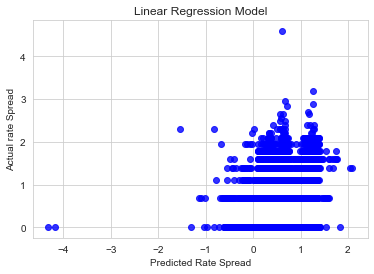

In [63]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.8, color='blue') #alpha helps to show overlapping data
plt.xlabel('Predicted Rate Spread')
plt.ylabel('Actual rate Spread')
plt.title('Linear Regression Model')
plt.show()

In [78]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 5, min_samples_split = 2,
                                         learning_rate = 0.1, loss = 'ls')

In [79]:
model2 = clf.fit(X_train, y_train)

In [80]:
print ("Our R^2 is a value of: \n", model2.score(X_test, y_test))

Our R^2 is a value of: 
 0.6799770687707076


In [81]:
clf.score(X_test, y_test)

0.6799770687707076

In [115]:
#Let's get our Root mean Squared error (RMSE)
predictions = model2.predict(X_test)

In [116]:
from sklearn.metrics import mean_squared_error
print ('Our RMSE is a value of: \n', mean_squared_error(y_test, predictions))

Our RMSE is a value of: 
 0.11831447521791284


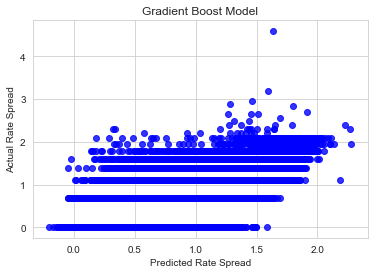

In [117]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.8, color='blue') #alpha helps to show overlapping data
plt.xlabel('Predicted Rate Spread')
plt.ylabel('Actual Rate Spread')
plt.title('Gradient Boost Model')
plt.show()

In [118]:
submission = pd.DataFrame()
submission['row_id'] = test_df.row_id

In [119]:
feats = test_df.select_dtypes(
        include=[np.number]).drop(['row_id'], axis=1).interpolate()

In [120]:
predictions = model2.predict(feats)

In [121]:
final_predictions = np.exp(predictions)

In [122]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [1.79438676 0.51066516 0.41603106 0.6618873  0.35071808] 

Final predictions are: 
 [6.01578446 1.66639925 1.51593295 1.93844732 1.42008692]


In [129]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, X_test))
print()
print("Classification Report")
print(classification_report(y_test, X_test))  

Confusion Matrix:


ValueError: Classification metrics can't handle a mix of continuous and continuous-multioutput targets

In [90]:
submission['rate_spread'] = final_predictions
submission.head()

,row_id,rate_spread
0,0,6.015784
1,1,1.666399
2,2,1.515933
3,3,1.938447
4,4,1.420087


In [91]:
submission.to_csv('submission_format.csv', index=False)